In [1]:
import yt
import netCDF4 as nc
import matplotlib.pyplot as plt
import pygrib
import pandas as pd
import xarray as xr
import cfgrib
import ipywidgets
import numpy as np

https://ramadda.unidata.ucar.edu/repository/entry/getentries

In [2]:
irene = nc.Dataset('data/Hurricane_Irene/GFS1.0degreeModelOutput/ireneFlowVector1000.nc')

In [10]:
irene

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.X
    History: Translated from VisAD grid to CF-1.X Conventions by IDV
Original Dataset = (Time -> ((lon[unit:degrees_east], lat[unit:degrees_north], pressure[unit:Pa]) -> (U-component_of_wind[unit:m_s-1]_2, V-component_of_wind[unit:m_s-1]_2)))
Translation Date = Thu Sep 01 13:11:22 MDT 2011
    dimensions(sizes): time(49), lon(110), lat(85), pressure(1)
    variables(dimensions): float64 time(time), float32 lon(lon), float32 lat(lat), float32 pressure(pressure), float32 U-component_of_wind(time, pressure, lat, lon), float32 V-component_of_wind(time, pressure, lat, lon)
    groups: 

In [11]:
irene.variables

{'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     units: s since 1970-01-01 00:00:00.000 UTC
 unlimited dimensions: 
 current shape = (49,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
     units: degrees_east
     long_name: longitude coordinate
     standard_name: longitude
 unlimited dimensions: 
 current shape = (110,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     units: degrees_north
     long_name: latitude coordinate
     standard_name: latitude
 unlimited dimensions: 
 current shape = (85,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'pressure': <class 'netCDF4._netCDF4.Variable'>
 float32 pressure(pressure)
     units: Pa
     positive: down
 unlimited dimensions: 
 current shape = (1,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'U-component_of_wind': <cla

In [12]:
ireneNAM = nc.Dataset('data/Hurricane_Irene/NAM12kmModelSubset/ireneNAMFlowVector500.nc')
ireneNAM2 = nc.Dataset('data/Hurricane_Irene/NAM12kmModelSubset/ireneNAMFlowVector1000.nc')

In [13]:
ireneNAM

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.X
    History: Translated from VisAD grid to CF-1.X Conventions by IDV
Original Dataset = (Time -> ((x[unit:km], y[unit:km], pressure[unit:Pa]) -> (U-component_of_wind[unit:m_s-1]_26, V-component_of_wind[unit:m_s-1]_26)))
Translation Date = Thu Sep 01 14:15:21 MDT 2011
    dimensions(sizes): time(40), x(103), y(72), pressure(1)
    variables(dimensions): float64 time(time), float32 x(x), float32 y(y), |S1 lambert_conformal_conic(), float32 pressure(pressure), float32 U-component_of_wind(time, pressure, y, x), float32 V-component_of_wind(time, pressure, y, x)
    groups: 

In [14]:
ireneNAM2.variables['U-component_of_wind'][::]

masked_array(
  data=[[[[ -0.64027405,   0.10972595,  -0.14027405, ...,  -7.390274  ,
            -7.640274  ,  -6.765274  ],
          [ -1.265274  ,  -0.64027405,  -1.140274  , ...,  -6.765274  ,
            -6.640274  ,  -5.765274  ],
          [ -1.515274  ,  -1.140274  ,  -1.890274  , ...,  -6.140274  ,
            -5.765274  ,  -4.640274  ],
          ...,
          [ 10.859726  ,  11.234726  ,  11.609726  , ...,  -6.015274  ,
            -5.765274  ,  -5.015274  ],
          [ 11.234726  ,  11.984726  ,  12.609726  , ...,  -4.390274  ,
            -3.640274  ,  -2.890274  ],
          [ 11.234726  ,  12.359726  ,  13.359726  , ...,  -2.640274  ,
            -1.890274  ,  -1.515274  ]]],


        [[[  1.0275116 ,   2.0275116 ,   0.5275116 , ...,  -7.0974884 ,
            -4.9724884 ,  -3.7224884 ],
          [  0.4025116 ,   0.7775116 ,  -1.4724884 , ...,  -6.5974884 ,
            -4.2224884 ,  -3.4724884 ],
          [ -0.2224884 ,  -0.5974884 ,  -2.9724884 , ...,  -5.4724884 ,

In [15]:
ireneNAM.variables['U-component_of_wind'][0]

masked_array(
  data=[[[ -6.734833 ,  -6.984833 ,  -7.359833 , ...,  -8.234833 ,
           -8.234833 ,  -7.984833 ],
         [ -6.484833 ,  -6.734833 ,  -6.984833 , ...,  -8.609833 ,
           -9.609833 , -10.109833 ],
         [ -6.609833 ,  -6.484833 ,  -6.234833 , ...,  -7.859833 ,
           -8.609833 ,  -9.609833 ],
         ...,
         [ 22.265167 ,  22.390167 ,  22.140167 , ...,   9.015167 ,
            6.890167 ,   6.390167 ],
         [ 20.890167 ,  21.515167 ,  21.390167 , ...,   5.390167 ,
            5.015167 ,   5.765167 ],
         [ 20.015167 ,  20.515167 ,  20.890167 , ...,   3.7651672,
            4.515167 ,   4.515167 ]]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [61]:
ireneNAM['time']

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    units: s since 1970-01-01 00:00:00.000 UTC
unlimited dimensions: 
current shape = (40,)
filling on, default _FillValue of 9.969209968386869e+36 used

# trying yt before talking to Matt

In [46]:
data_filename = 'data/Hurricane_Irene/GFS1.0degreeModelOutput/ireneFlowVector1000.nc'

nc_dataset = nc.Dataset(data_filename, 'r+')
latitude = nc_dataset.variables['lat'][::-1]
longitude = nc_dataset.variables['lon'][:]
depth = nc_dataset.variables['time'][:]


In [47]:
v_names = ['U-component_of_wind', 'V-component_of_wind']

for v in v_names:
    print(v)
    print(nc_dataset.variables[v])

U-component_of_wind
<class 'netCDF4._netCDF4.Variable'>
float32 U-component_of_wind(time, pressure, lat, lon)
    units: m s-1
unlimited dimensions: 
current shape = (49, 1, 85, 110)
filling on, default _FillValue of 9.969209968386869e+36 used
V-component_of_wind
<class 'netCDF4._netCDF4.Variable'>
float32 V-component_of_wind(time, pressure, lat, lon)
    units: m s-1
unlimited dimensions: 
current shape = (49, 1, 85, 110)
filling on, default _FillValue of 9.969209968386869e+36 used


In [48]:
print(nc_dataset.variables["pressure"])

print(nc_dataset.variables.keys())

<class 'netCDF4._netCDF4.Variable'>
float32 pressure(pressure)
    units: Pa
    positive: down
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used
dict_keys(['time', 'lon', 'lat', 'pressure', 'U-component_of_wind', 'V-component_of_wind'])


In [49]:
data = {v: nc_dataset.variables[v][::-1,::-1,:] for v in v_names}

for i in data:
    data[i].shape = (data[i].shape[0], data[i].shape[2], data[i].shape[3])
    print(data[i].shape)

(49, 85, 110)
(49, 85, 110)


In [61]:

bbox = np.array([[depth[0], depth[-1]],
                [latitude[0], latitude[-1]],
                [longitude[0],longitude[-1]]])
print(bbox)
ds = yt.load_uniform_grid(data, domain_dimensions = (depth.shape[0], latitude.shape[0], longitude.shape[0]),
                          bbox = bbox, length_unit=1000,
                          geometry = ('internal_geographic', ('depth', 'latitude', 'longitude')))

# ds.outer_radius = yt.units.km

yt : [INFO     ] 2022-06-16 11:29:00,865 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-06-16 11:29:00,865 Parameters: domain_dimensions         = [ 49  85 110]
yt : [INFO     ] 2022-06-16 11:29:00,866 Parameters: domain_left_edge          = [ 1.3135392e+09 -8.0000000e+00  2.3400000e+02]
yt : [INFO     ] 2022-06-16 11:29:00,866 Parameters: domain_right_edge         = [1.314576e+09 7.600000e+01 3.430000e+02]
yt : [INFO     ] 2022-06-16 11:29:00,867 Parameters: cosmological_simulation   = 0


[[ 1.3135392e+09  1.3145760e+09]
 [-8.0000000e+00  7.6000000e+01]
 [ 2.3400000e+02  3.4300000e+02]]


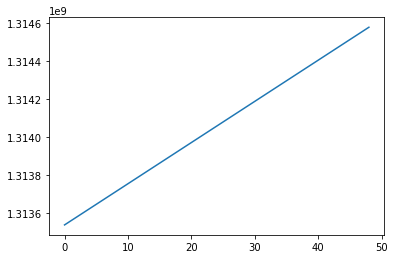

In [62]:
plt.plot(time)

In [63]:
ds.domain_width

In [64]:
ds.domain_left_edge

In [65]:
ds.domain_right_edge

In [66]:
(1314576000.0+1313539200.0)/2

1314057600.0

yt : [INFO     ] 2022-06-22 10:45:45,283 xlim = 234.000000 343.000000
yt : [INFO     ] 2022-06-22 10:45:45,285 ylim = -8.000000 76.000000
yt : [INFO     ] 2022-06-22 10:45:45,288 Making a fixed resolution buffer of (V-component_of_wind) 800 by 800
yt : [INFO     ] 2022-06-22 10:45:45,343 Making a fixed resolution buffer of (('stream', 'V-component_of_wind')) 800 by 800
yt : [WARNING  ] 2022-06-22 10:45:45,368 Plotting ('stream', 'V-component_of_wind'): All values = 0.0 dimensionless
yt : [WARNING  ] 2022-06-22 10:45:45,368 Switching to linear colorbar scaling.



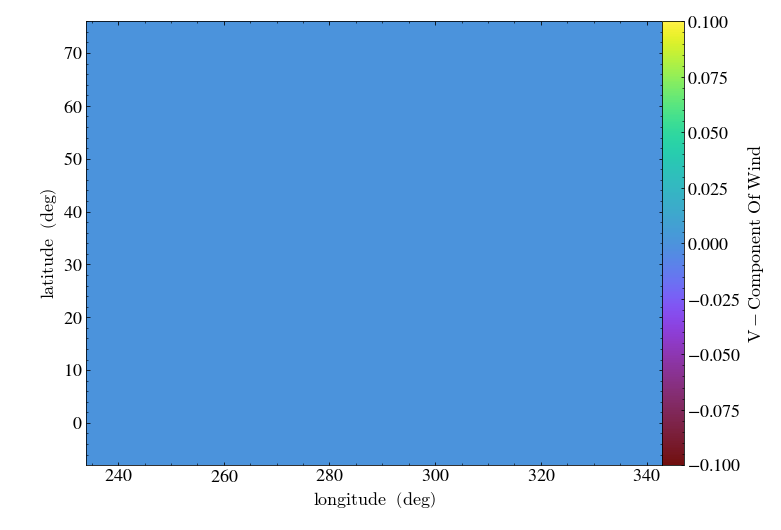


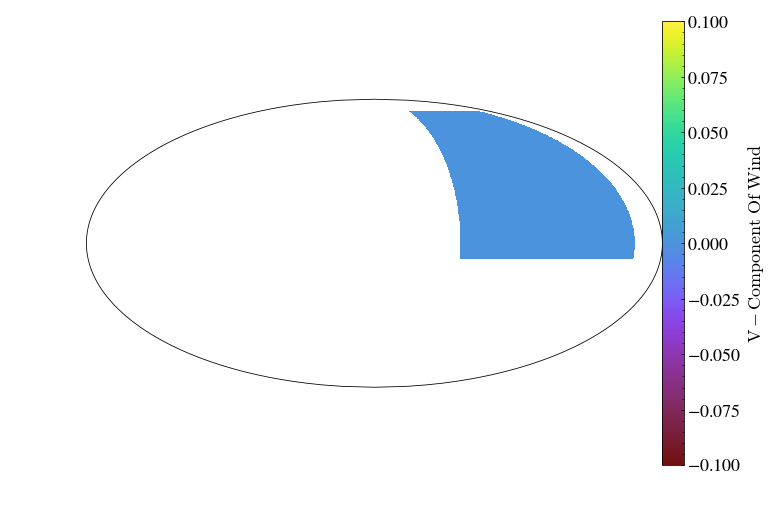

In [76]:
ds.r[(1.5,'unitary'),:,:].plot("V-component_of_wind").set_mpl_projection("Mollweide")



yt : [INFO     ] 2022-06-21 15:52:22,410 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2022-06-21 15:52:22,491 xlim = -1036800.000000 1036800.000000
yt : [INFO     ] 2022-06-21 15:52:22,492 ylim = -1036800.000000 1036800.000000
yt : [INFO     ] 2022-06-21 15:52:22,509 xlim = -1036800.000000 1036800.000000
yt : [INFO     ] 2022-06-21 15:52:22,510 ylim = -1036800.000000 1036800.000000
yt : [INFO     ] 2022-06-21 15:52:22,516 Making a fixed resolution buffer of (('stream', 'U-component_of_wind')) 800 by 800
yt : [WARNING  ] 2022-06-21 15:52:22,572 Plotting ('stream', 'U-component_of_wind'): Both positive and negative values. Min = -29.700000762939453 dimensionless, Max = 27.100000381469727 dimensionless.
yt : [WARNING  ] 2022-06-21 15:52:22,574 Switching to symlog colorbar scaling.



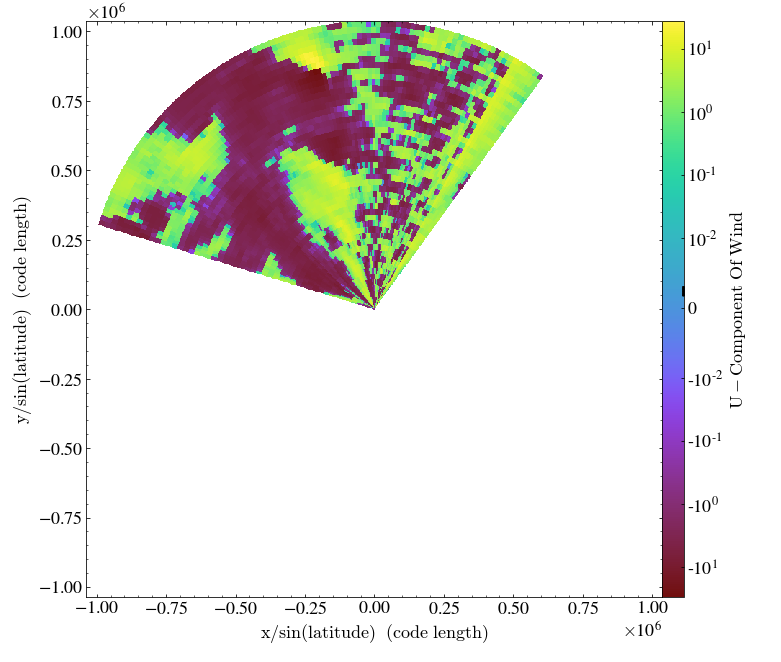

In [74]:
yt.SlicePlot(ds,'latitude','U-component_of_wind')

yt : [INFO     ] 2022-06-22 10:46:27,017 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2022-06-22 10:46:27,029 xlim = -1036800.000000 1036800.000000
yt : [INFO     ] 2022-06-22 10:46:27,031 ylim = -1036800.000000 1036800.000000
yt : [INFO     ] 2022-06-22 10:46:27,034 xlim = -1036800.000000 1036800.000000
yt : [INFO     ] 2022-06-22 10:46:27,035 ylim = -1036800.000000 1036800.000000
yt : [INFO     ] 2022-06-22 10:46:27,037 Making a fixed resolution buffer of (('stream', 'V-component_of_wind')) 800 by 800
yt : [WARNING  ] 2022-06-22 10:46:27,064 Plotting ('stream', 'V-component_of_wind'): Both positive and negative values. Min = -14.979999542236328 dimensionless, Max = 31.760000228881836 dimensionless.
yt : [WARNING  ] 2022-06-22 10:46:27,065 Switching to symlog colorbar scaling.



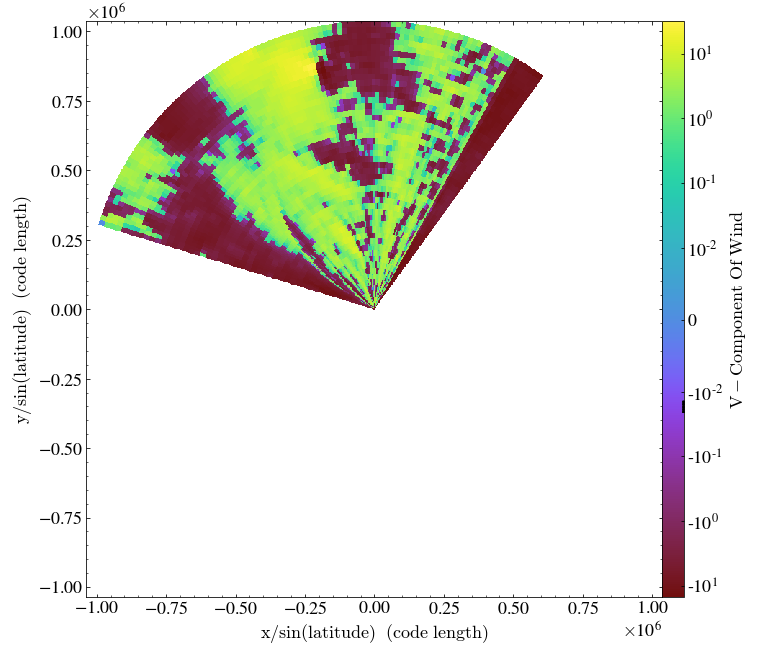

In [78]:
yt.SlicePlot(ds,'latitude','V-component_of_wind')

yt : [INFO     ] 2022-06-22 10:46:20,025 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2022-06-22 10:46:20,039 xlim = 0.000000 1036800.000000
yt : [INFO     ] 2022-06-22 10:46:20,040 ylim = -1036800.000000 1036800.000000
yt : [INFO     ] 2022-06-22 10:46:20,042 xlim = 0.000000 1036800.000000
yt : [INFO     ] 2022-06-22 10:46:20,043 ylim = -1036800.000000 1036800.000000
yt : [INFO     ] 2022-06-22 10:46:20,044 Making a fixed resolution buffer of (('stream', 'U-component_of_wind')) 800 by 800
yt : [WARNING  ] 2022-06-22 10:46:20,078 Plotting ('stream', 'U-component_of_wind'): Both positive and negative values. Min = -29.389999389648438 dimensionless, Max = 18.670000076293945 dimensionless.
yt : [WARNING  ] 2022-06-22 10:46:20,079 Switching to symlog colorbar scaling.



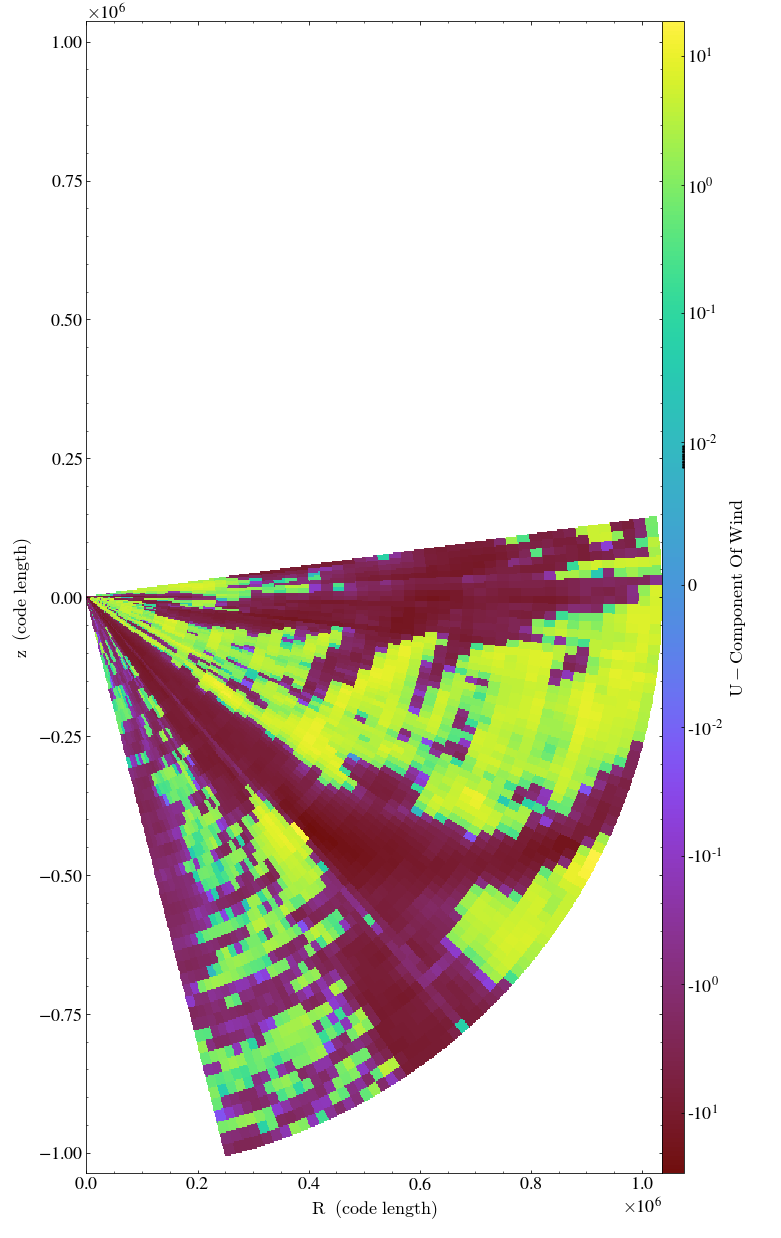

In [77]:
yt.SlicePlot(ds,'longitude','U-component_of_wind')

yt : [INFO     ] 2022-06-22 10:47:32,139 Setting origin='native' for internal_geographic geometry.
yt : [INFO     ] 2022-06-22 10:47:32,147 xlim = 0.000000 1036800.000000
yt : [INFO     ] 2022-06-22 10:47:32,148 ylim = -1036800.000000 1036800.000000
yt : [INFO     ] 2022-06-22 10:47:32,151 xlim = 0.000000 1036800.000000
yt : [INFO     ] 2022-06-22 10:47:32,153 ylim = -1036800.000000 1036800.000000
yt : [INFO     ] 2022-06-22 10:47:32,157 Making a fixed resolution buffer of (('stream', 'V-component_of_wind')) 800 by 800
yt : [WARNING  ] 2022-06-22 10:47:32,191 Plotting ('stream', 'V-component_of_wind'): Both positive and negative values. Min = -26.719999313354492 dimensionless, Max = 23.850000381469727 dimensionless.
yt : [WARNING  ] 2022-06-22 10:47:32,191 Switching to symlog colorbar scaling.



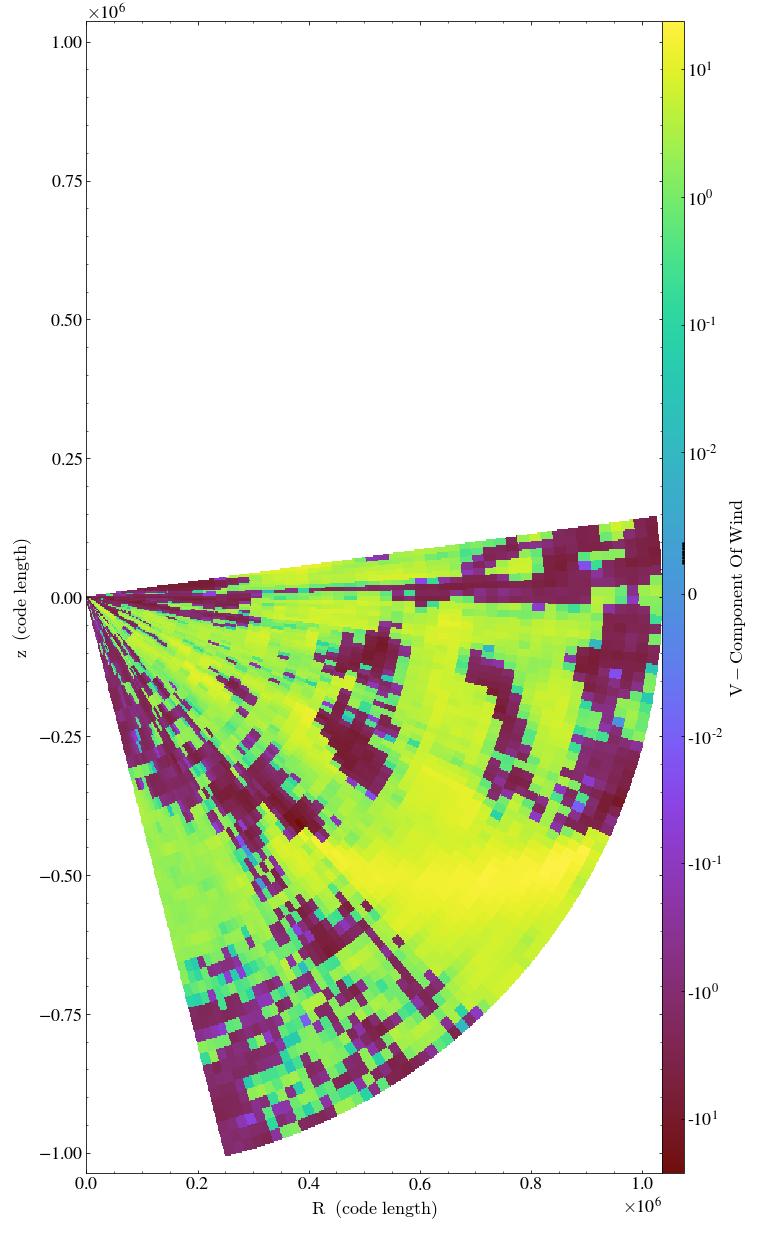

In [79]:
yt.SlicePlot(ds,'longitude','V-component_of_wind')